In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import time

In [2]:
import os
cwd = os.getcwd()
cwd

'D:\\Ali\\BootCamp\\Challenge\\Project_1\\project1'

In [3]:
stock_raw = pd.read_csv('NFLX - COVID.csv', 
                        encoding = 'utf-8')

cases_raw = pd.read_csv('cases_shortened.csv',
                       encoding = 'utf-8')
cases_raw = cases_raw.rename(columns={'Day' : 'Date', 'Daily new confirmed cases of COVID-19': 'New Cases',\
                                      'Daily new confirmed deaths due to COVID-19':'New Deaths'})
cases_raw = cases_raw[['Date', 'New Cases','New Deaths']]

In [4]:
stock_raw

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200
...,...,...,...,...,...,...,...
858,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
859,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
860,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
861,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100


In [5]:
cases_raw

,Date,New Cases,New Deaths
0,2020-01-22,0,0
1,2020-01-23,100,1
2,2020-01-24,287,8
3,2020-01-25,493,16
4,2020-01-26,683,14
...,...,...,...
1041,2022-11-28,425018,1155
1042,2022-11-29,724938,1501
1043,2022-11-30,525142,1609
1044,2022-12-01,726364,2728


In [6]:
stock_cases = pd.merge(stock_raw, cases_raw, how = 'left')
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,New Cases,New Deaths
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,NaN,NaN
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,NaN,NaN
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,NaN,NaN
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,NaN,NaN
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,NaN,NaN
...,...,...,...,...,...,...,...,...,...
858,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,568074.0,1916.0
859,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,618580.0,1477.0
860,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200,692064.0,2064.0
861,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100,524610.0,1634.0


In [7]:
stock_cases.insert(9,'Case Fatality','')
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,New Cases,New Deaths,Case Fatality
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,NaN,NaN,
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,NaN,NaN,
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,NaN,NaN,
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,NaN,NaN,
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...
858,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,568074.0,1916.0,
859,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,618580.0,1477.0,
860,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200,692064.0,2064.0,
861,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100,524610.0,1634.0,


In [8]:
stock_cases['Case Fatality'] = stock_cases.apply(\
    lambda x: round((x['New Deaths']/x['New Cases'])*100,2) if x['New Cases'] != 0 else 0, axis=1)
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,New Cases,New Deaths,Case Fatality
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,NaN,NaN,NaN
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,NaN,NaN,NaN
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,NaN,NaN,NaN
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,NaN,NaN,NaN
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
858,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,568074.0,1916.0,0.34
859,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,618580.0,1477.0,0.24
860,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200,692064.0,2064.0,0.30
861,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100,524610.0,1634.0,0.31


In [9]:
stock_cases=stock_cases.fillna(0)
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,New Cases,New Deaths,Case Fatality
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0.0,0.0,0.00
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0.0,0.0,0.00
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0.0,0.0,0.00
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0.0,0.0,0.00
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
858,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,568074.0,1916.0,0.34
859,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,618580.0,1477.0,0.24
860,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200,692064.0,2064.0,0.30
861,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100,524610.0,1634.0,0.31


In [10]:
stock_cases.count()

Date             863
Open             863
High             863
Low              863
Close            863
Adj Close        863
Volume           863
New Cases        863
New Deaths       863
Case Fatality    863
dtype: int64

In [11]:
length=len(stock_raw['Date'])

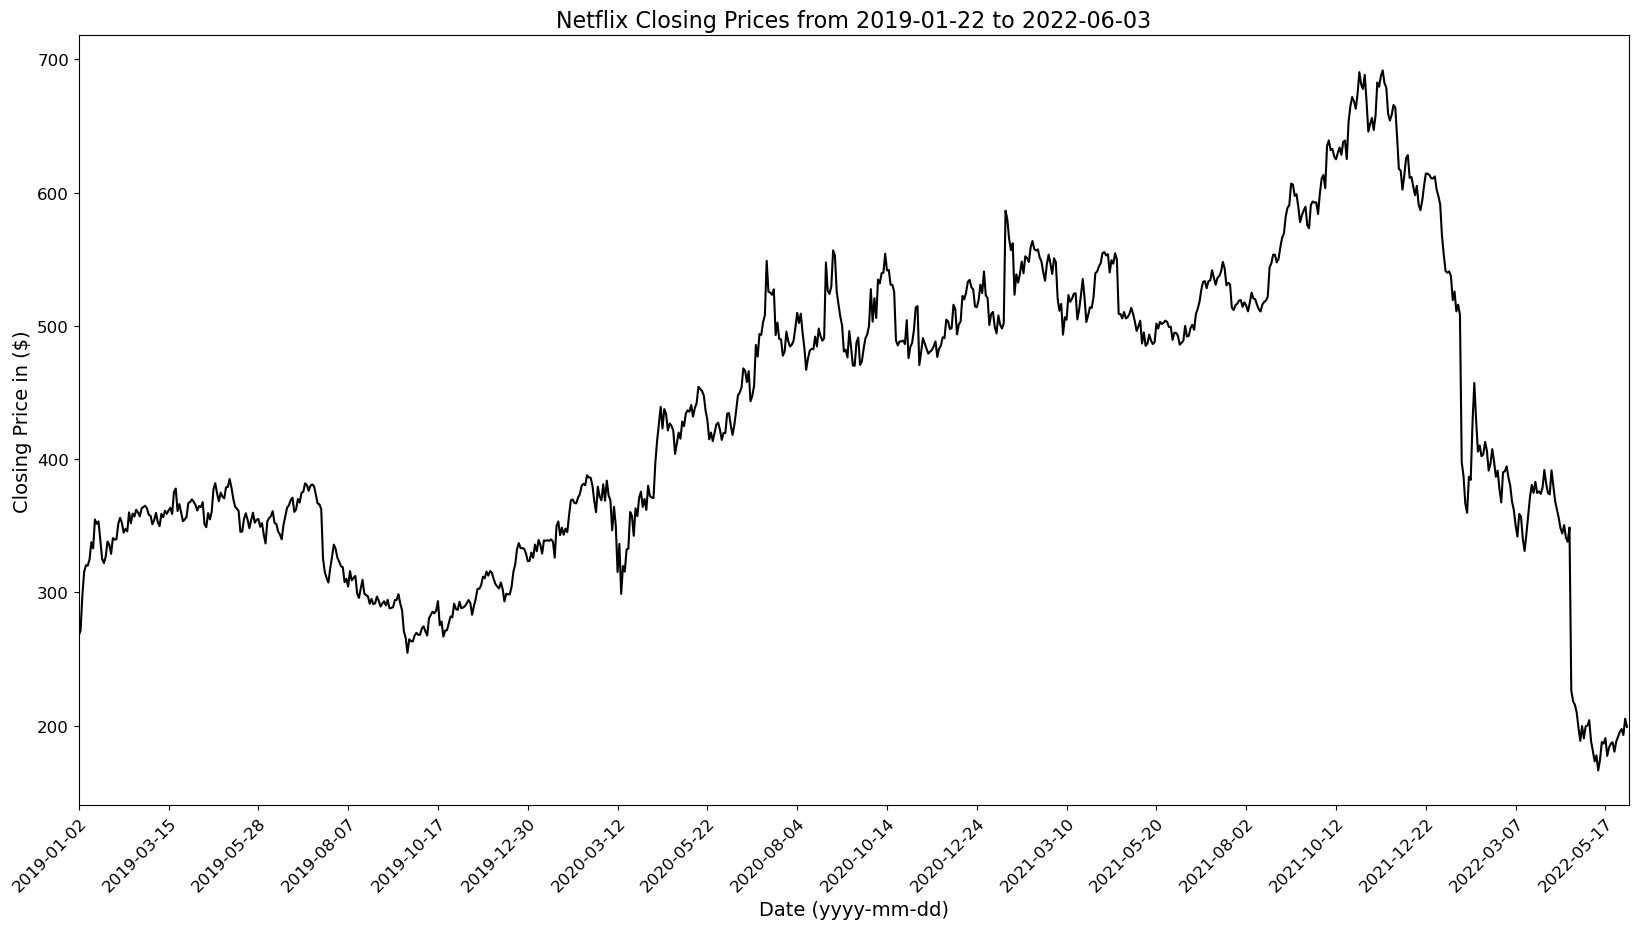

In [12]:
# Main Stock trend:
plt.figure(figsize=(20,10))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.plot(stock_cases['Date'], stock_cases['Close'], color = 'k', label='Close Price')
plt.xticks(np.arange(0, length, 50), rotation = 45, rotation_mode = 'anchor', ha = 'right', fontsize='12')
plt.yticks(fontsize='12')
plt.xlim(0, length)
plt.xlabel('Date (yyyy-mm-dd)', fontsize='14')
plt.ylabel('Closing Price in ($)', fontsize='14')
plt.title('Netflix Closing Prices from 2019-01-22 to 2022-06-03', fontsize='16')
# Saving Plot Code --------------------------
plt.show()

In [13]:
#SMA (Simple Moving Average) Indicator
def SMA(data, period=7, Column='Close'):
    return data[Column].rolling(window=period).mean()

In [14]:
# adding Indicator
# stock_cases['SMA7']=SMA(stock_cases,7)
stock_cases['SMA30']=SMA(stock_cases,30)
stock_cases['SMA90']=SMA(stock_cases,90)
# stock_cases['SMA180']=SMA(stock_cases,180)
# stock_cases['SMA365']=SMA(stock_cases,365)
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,New Cases,New Deaths,Case Fatality,SMA30,SMA90
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0.0,0.0,0.00,NaN,NaN
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0.0,0.0,0.00,NaN,NaN
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0.0,0.0,0.00,NaN,NaN
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0.0,0.0,0.00,NaN,NaN
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0.0,0.0,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
858,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,568074.0,1916.0,0.34,201.704332,321.538445
859,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,618580.0,1477.0,0.24,197.023666,318.085001
860,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200,692064.0,2064.0,0.30,191.833667,315.811779
861,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100,524610.0,1634.0,0.31,191.130333,313.788890


In [15]:
# Buy and Sell Signal Define
stock_cases['Signal']=np.where(stock_cases['SMA30']>stock_cases['SMA90'], 1, 0)
stock_cases['Position']=stock_cases['Signal'].diff()

stock_cases['Buy']=np.where(stock_cases['Position']== 1, stock_cases['Close'], np.NAN)
stock_cases['Sell']=np.where(stock_cases['Position']== -1, stock_cases['Close'], np.NAN)
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,New Cases,New Deaths,Case Fatality,SMA30,SMA90,Signal,Position,Buy,Sell
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0.0,0.0,0.00,NaN,NaN,0,NaN,NaN,NaN
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0.0,0.0,0.00,NaN,NaN,0,0.0,NaN,NaN
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0.0,0.0,0.00,NaN,NaN,0,0.0,NaN,NaN
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0.0,0.0,0.00,NaN,NaN,0,0.0,NaN,NaN
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0.0,0.0,0.00,NaN,NaN,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,568074.0,1916.0,0.34,201.704332,321.538445,0,0.0,NaN,NaN
859,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,618580.0,1477.0,0.24,197.023666,318.085001,0,0.0,NaN,NaN
860,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200,692064.0,2064.0,0.30,191.833667,315.811779,0,0.0,NaN,NaN
861,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100,524610.0,1634.0,0.31,191.130333,313.788890,0,0.0,NaN,NaN


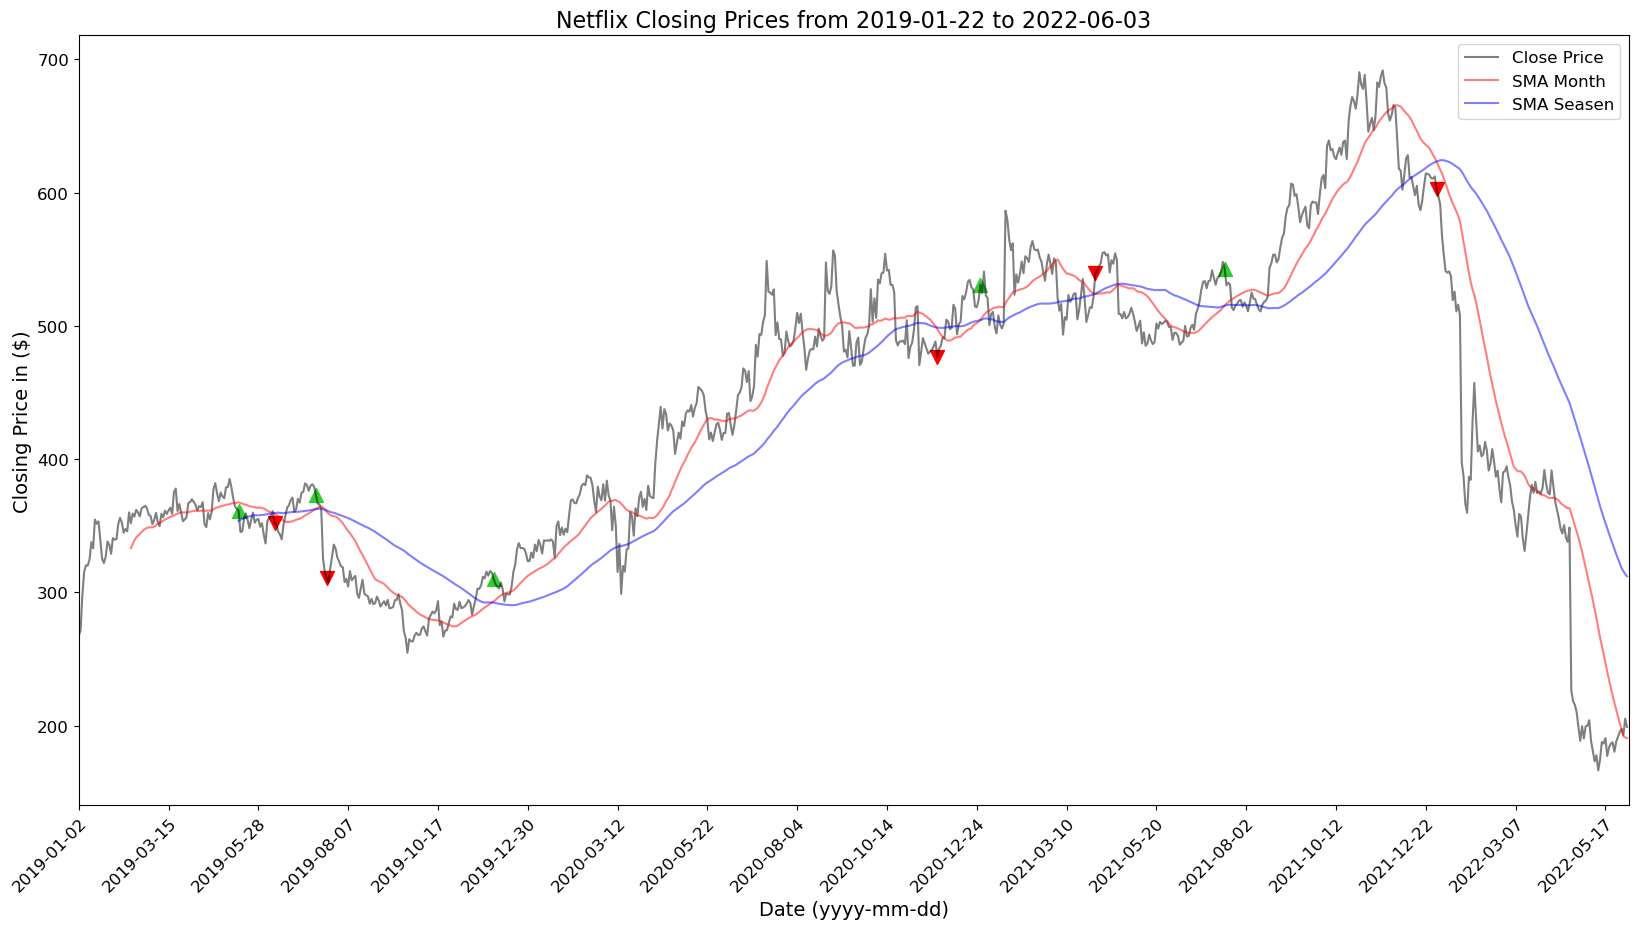

In [16]:
plt.figure(figsize=(20,10))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.plot(stock_cases['Date'], stock_cases['Close'], color = 'k', alpha=0.5, label='Close Price')
# plt.plot(final_stock_cases['Date'], final_stock_cases['SMA7'], color = 'y', alpha=0.8, label='SMA Week')
plt.plot(stock_cases['Date'], stock_cases['SMA30'], color = 'r', alpha=0.5, label='SMA Month')
plt.plot(stock_cases['Date'], stock_cases['SMA90'], color = 'b', alpha=0.5, label='SMA Seasen')
# plt.plot(final_stock_cases['Date'], final_stock_cases['SMA180'], color = 'hotpink', alpha=0.5, label='SMA 2 Seasen')
# plt.plot(final_stock_cases['Date'], final_stock_cases['SMA365'], color = 'peru', alpha=0.5, label='SMA year')
sizes = [100]
plt.scatter(stock_cases['Date'],stock_cases['Buy'], sizes, alpha=1, marker='^', color= 'limegreen')
plt.scatter(stock_cases['Date'],stock_cases['Sell'], sizes, alpha=1, marker='v', color= 'red')
plt.xticks(np.arange(0, length, 50), rotation = 45, rotation_mode = 'anchor', ha = 'right', fontsize='12')
plt.yticks(fontsize='12')
plt.xlim(0, length)
plt.legend(fontsize='12')
plt.xlabel('Date (yyyy-mm-dd)', fontsize='14')
plt.ylabel('Closing Price in ($)', fontsize='14')
plt.title('Netflix Closing Prices from 2019-01-22 to 2022-06-03', fontsize='16')
plt.show()

In [17]:
stock_cases=stock_cases.fillna(0)
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,New Cases,New Deaths,Case Fatality,SMA30,SMA90,Signal,Position,Buy,Sell
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0.0,0.0,0.00,0.000000,0.000000,0,0.0,0.0,0.0
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0.0,0.0,0.00,0.000000,0.000000,0,0.0,0.0,0.0
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0.0,0.0,0.00,0.000000,0.000000,0,0.0,0.0,0.0
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0.0,0.0,0.00,0.000000,0.000000,0,0.0,0.0,0.0
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0.0,0.0,0.00,0.000000,0.000000,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,568074.0,1916.0,0.34,201.704332,321.538445,0,0.0,0.0,0.0
859,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,618580.0,1477.0,0.24,197.023666,318.085001,0,0.0,0.0,0.0
860,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200,692064.0,2064.0,0.30,191.833667,315.811779,0,0.0,0.0,0.0
861,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100,524610.0,1634.0,0.31,191.130333,313.788890,0,0.0,0.0,0.0


In [18]:
#SMA Indicator output for month/season
stock_cases_buy_sell= stock_cases[(stock_cases["Buy"] != 0) | \
                                              (stock_cases["Sell"] != 0) ][['Date','Buy','Sell']]
stock_cases_buy_sell

,Date,Buy,Sell
89,2019-05-10,361.040009,0.000000
109,2019-06-10,0.000000,352.010010
132,2019-07-12,373.250000,0.000000
138,2019-07-22,0.000000,310.619995
231,2019-12-02,309.989990,0.000000
478,2020-11-23,0.000000,476.619995
502,2020-12-29,530.869995,0.000000
566,2021-04-01,0.000000,539.419983
638,2021-07-15,542.950012,0.000000
756,2021-12-31,0.000000,602.440002


In [19]:
# IchimokuCloud Indicator
def IchimokuCloud(df):
    high_9 = df['High'].rolling(window= 9).max()
    low_9 = df['Low'].rolling(window= 9).min()
    df['tenkan_sen'] = (high_9 + low_9) /2

    high_26 = df['High'].rolling(window= 26).max()
    low_26 = df['Low'].rolling(window= 26).min()
    df['kijun_sen'] = (high_26 + low_26) /2

    last_index = df.iloc[-1:].index[0]
    last_date = df['Date']

    df['senkou_span_a'] = ((df['tenkan_sen'] + df['kijun_sen']) / 2).shift(26)

    high_52 = df['High'].rolling(window= 52).max()
    low_52 = df['Low'].rolling(window= 52).min()
    df['senkou_span_b'] = ((high_52 + low_52) /2).shift(26)

    df['chikou_span'] = df['Close'].shift(-22) 

    plt.figure(figsize=(20,10))
    plt.plot(df['Date'], df['Close'], color = 'k', alpha=0.5, label='Close Price')
    plt.plot(df['Date'], df['senkou_span_a'], color = 'limegreen', alpha=0.5, label='Senkou Span A')
    plt.plot(df['Date'], df['senkou_span_b'], color = 'orangered', alpha=0.5, label='Senkou Span B')
    plt.fill_between(df['Date'], df.senkou_span_a, df.senkou_span_b,where = df.senkou_span_a >=\
                    df.senkou_span_b, color = 'limegreen')
    plt.fill_between(df['Date'], df.senkou_span_a, df.senkou_span_b,where = df.senkou_span_a < \
                    df.senkou_span_b, color = 'orangered')
    plt.xticks(np.arange(0, length, 50), rotation = 45, rotation_mode = 'anchor', ha = 'right', fontsize='12')
    plt.yticks(fontsize='12')
    plt.xlim(0, length)
    plt.legend(fontsize='12')
    plt.xlabel('Date (yyyy-mm-dd)', fontsize='14')
    plt.ylabel('Closing Price in ($)', fontsize='14')
    plt.title('Netflix Closing Prices from 2019-01-22 to 2022-06-03', fontsize='16')
    plt.show()
    return

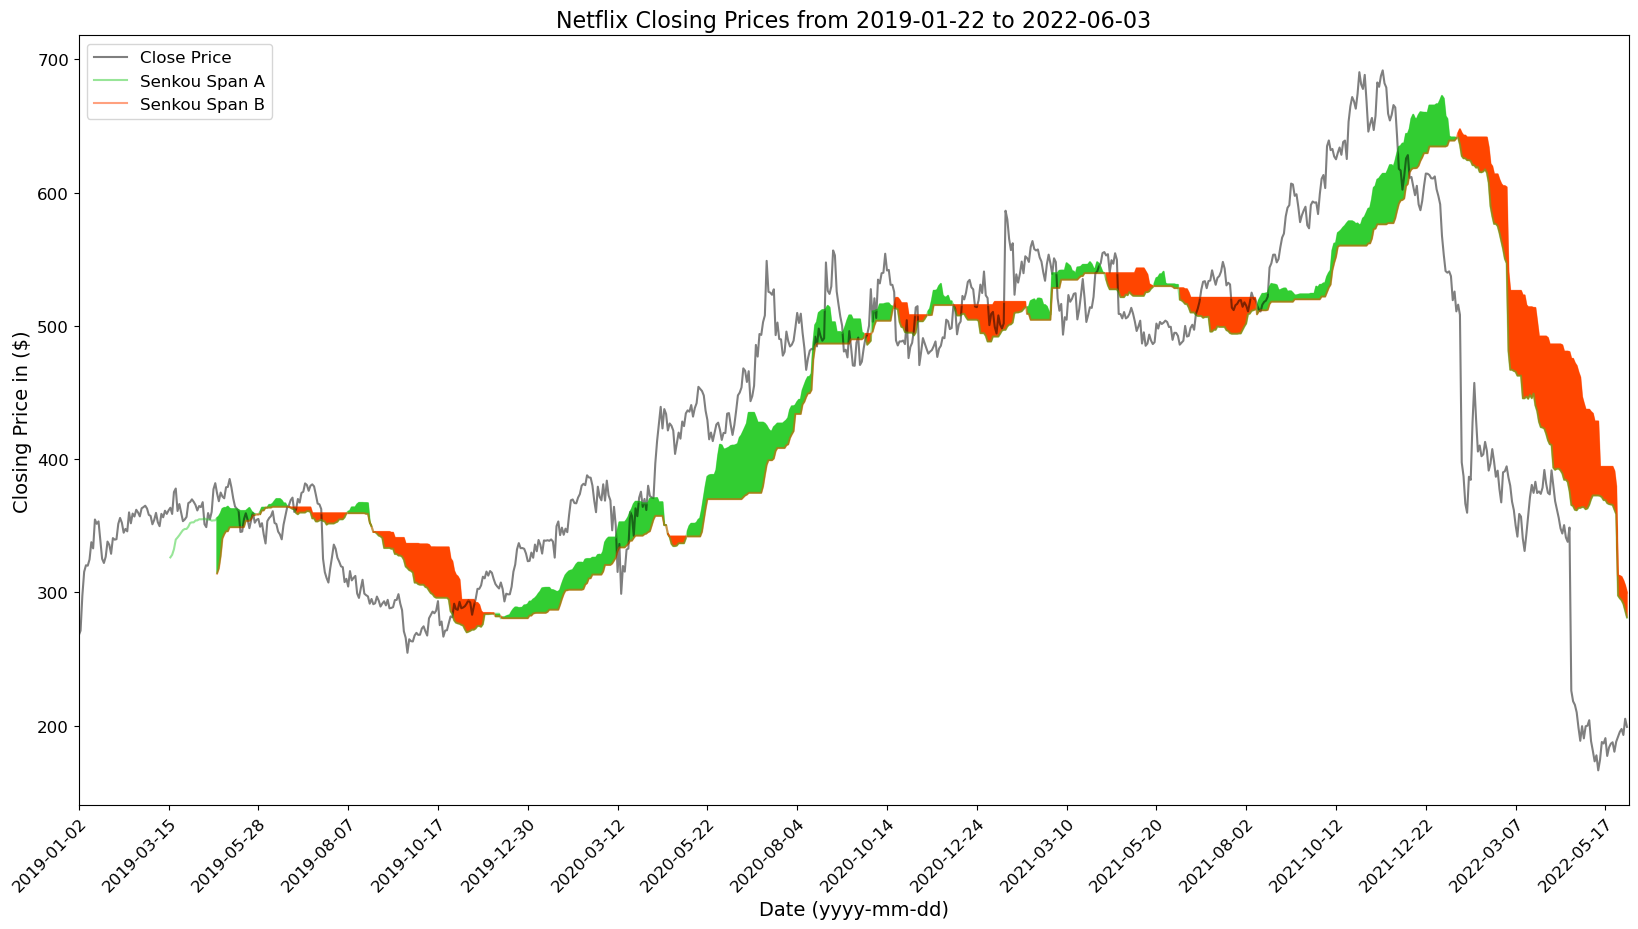

In [20]:
IchimokuCloud(stock_cases)

In [21]:
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,New Cases,New Deaths,Case Fatality,...,SMA90,Signal,Position,Buy,Sell,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0.0,0.0,0.00,...,0.000000,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,351.339996
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0.0,0.0,0.00,...,0.000000,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,355.809998
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0.0,0.0,0.00,...,0.000000,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,352.190002
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0.0,0.0,0.00,...,0.000000,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,344.709991
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0.0,0.0,0.00,...,0.000000,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,347.570007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,568074.0,1916.0,0.34,...,321.538445,0,0.0,0.0,0.0,185.480004,194.490005,295.510002,312.250007,NaN
859,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,618580.0,1477.0,0.24,...,318.085001,0,0.0,0.0,0.0,187.830002,189.685005,294.002502,311.515007,NaN
860,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200,692064.0,2064.0,0.30,...,315.811779,0,0.0,0.0,0.0,189.225006,185.930001,291.232499,308.745003,NaN
861,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100,524610.0,1634.0,0.31,...,313.788890,0,0.0,0.0,0.0,191.319999,184.090004,286.264999,304.944992,NaN


In [22]:
# Average directional index (ADX)
def ADX(df, period):
    """
    Computes the ADX indicator.
    """
    alpha = 1/period

    # TR
    df['H-L'] = df['High'] - df['Low']
    df['H-C'] = np.abs(df['High'] - df['Close'].shift(1))
    df['L-C'] = np.abs(df['Low'] - df['Close'].shift(1))
    df['TR'] = df[['H-L', 'H-C', 'L-C']].max(axis=1)
    del df['H-L'], df['H-C'], df['L-C']

    # ATR
    df['ATR'] = df['TR'].ewm(alpha=alpha, adjust=False).mean()

    # +-DX
    df['H-pH'] = df['High'] - df['High'].shift(1)
    df['pL-L'] = df['Low'].shift(1) - df['Low']
    df['+DX'] = np.where(
        (df['H-pH'] > df['pL-L']) & (df['H-pH']>0),
        df['H-pH'],
        0.0
    )
    df['-DX'] = np.where(
        (df['H-pH'] < df['pL-L']) & (df['pL-L']>0),
        df['pL-L'],
        0.0
    )
    del df['H-pH'], df['pL-L']

    # +- DMI
    df['S+DM'] = df['+DX'].ewm(alpha=alpha, adjust=False).mean()
    df['S-DM'] = df['-DX'].ewm(alpha=alpha, adjust=False).mean()
    df['+DMI'] = (df['S+DM']/df['ATR'])*100
    df['-DMI'] = (df['S-DM']/df['ATR'])*100
    del df['S+DM'], df['S-DM']

    # ADX
    df['DX'] = (np.abs(df['+DMI'] - df['-DMI'])/(df['+DMI'] + df['-DMI']))*100
    df['ADX'+str(period)] = df['DX'].ewm(alpha=alpha, adjust=False).mean()
    del df['DX'], df['ATR'], df['TR'], df['-DX'], df['+DX'], df['+DMI'], df['-DMI']

    return df

In [23]:
ADX(stock_cases,30)
ADX(stock_cases,14)

,Date,Open,High,Low,Close,Adj Close,Volume,New Cases,New Deaths,Case Fatality,...,Position,Buy,Sell,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span,ADX30,ADX14
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0.0,0.0,0.00,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,351.339996,NaN,NaN
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0.0,0.0,0.00,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,355.809998,100.000000,100.000000
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0.0,0.0,0.00,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,352.190002,100.000000,100.000000
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0.0,0.0,0.00,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,344.709991,100.000000,100.000000
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0.0,0.0,0.00,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,347.570007,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,568074.0,1916.0,0.34,...,0.0,0.0,0.0,185.480004,194.490005,295.510002,312.250007,NaN,42.605000,46.271963
859,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,618580.0,1477.0,0.24,...,0.0,0.0,0.0,187.830002,189.685005,294.002502,311.515007,NaN,42.363564,44.151348
860,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200,692064.0,2064.0,0.30,...,0.0,0.0,0.0,189.225006,185.930001,291.232499,308.745003,NaN,42.067742,41.860160
861,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100,524610.0,1634.0,0.31,...,0.0,0.0,0.0,191.319999,184.090004,286.264999,304.944992,NaN,41.720317,39.419166


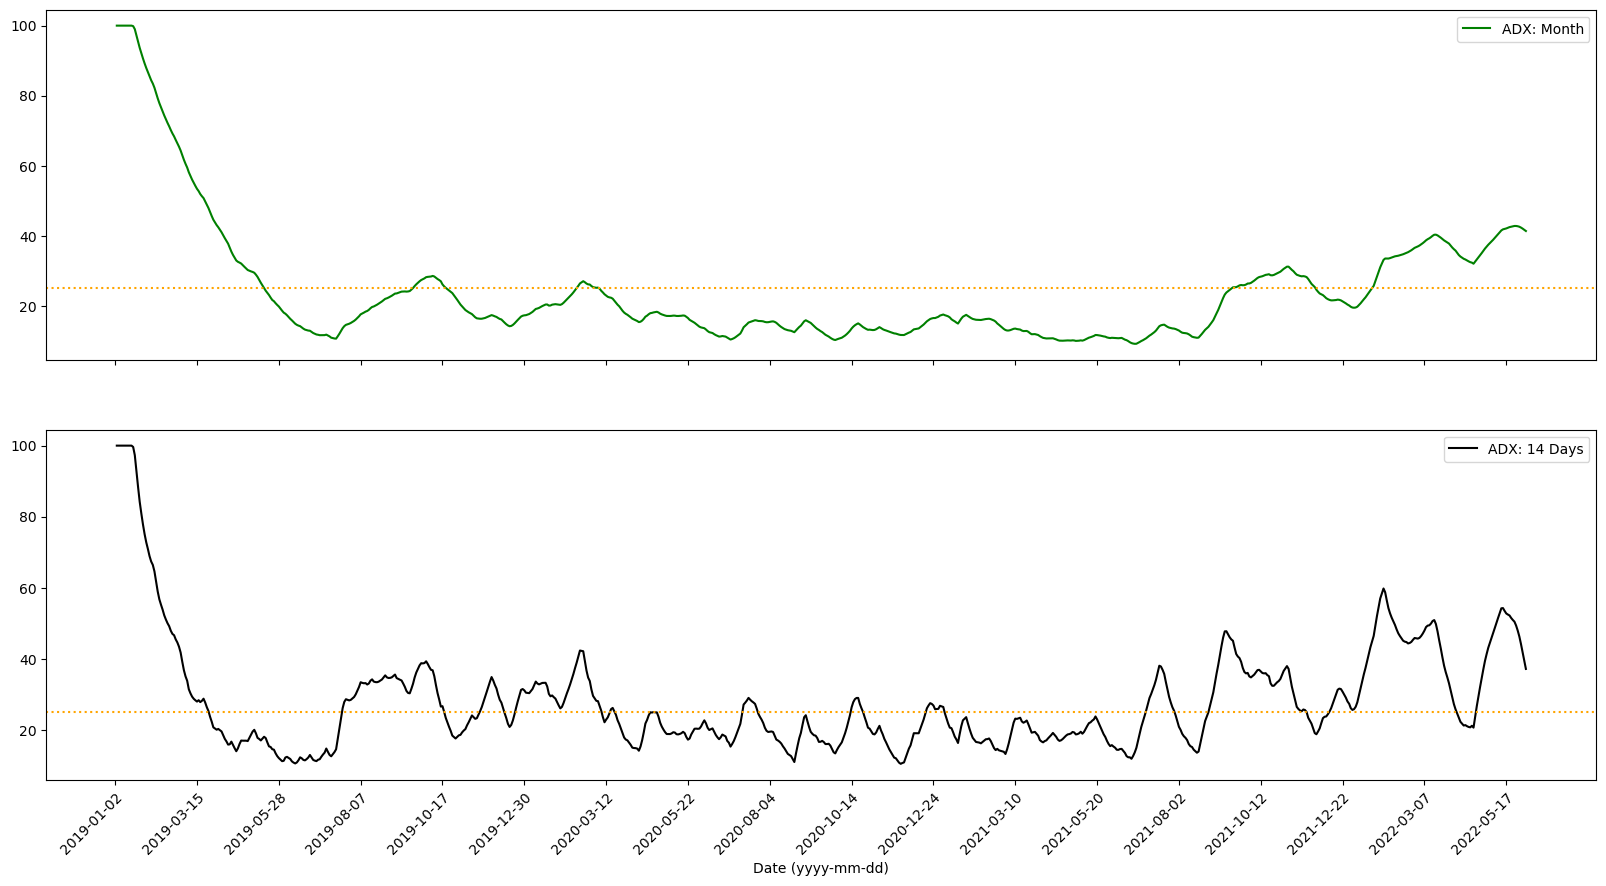

In [24]:
fig,(ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(20,10))
# If plt.figure does not change the size, try placing it before plt.plot!

ax1.plot(stock_cases['Date'], stock_cases['ADX30'], color = 'green', label='ADX: Month')
# plt.plot(final_stock_cases['Date'], final_stock_cases['ADX7'], color = 'red', label='Week')
ax2.plot(stock_cases['Date'], stock_cases['ADX14'], color = 'k', label='ADX: 14 Days')
plt.xticks(np.arange(0, len(stock_cases['Date']), 50), rotation = 45, rotation_mode = 'anchor', ha = 'right')
# plt.xlim(0, 598)
ax1.axhline(25, color='orange', linestyle='dotted')
ax2.axhline(25, color='orange', linestyle='dotted')
# ax1.axhline(31, color='orange', linestyle='dotted')
plt.xlabel('Date (yyyy-mm-dd)')
# plt.title('Netflix Closing Prices from 2019-01-22 to 2022-06-03')
ax1.legend()
ax2.legend()
plt.show()

In [25]:
stock_cases_ADX= stock_cases[(stock_cases["ADX14"] >= 25) & (stock_cases["ADX14"] < 60) ][['Date','ADX14']]
stock_cases_ADX

,Date,ADX14
26,2019-02-08,58.932681
27,2019-02-11,56.736691
28,2019-02-12,55.230513
29,2019-02-13,53.831920
30,2019-02-14,52.224087
...,...,...
858,2022-05-27,46.271963
859,2022-05-31,44.151348
860,2022-06-01,41.860160
861,2022-06-02,39.419166


In [26]:
stock_cases_ADX= stock_cases[(stock_cases["ADX14"] >= 25) &\
                                         (stock_cases["ADX30"] >= 25) &\
                                         (stock_cases["ADX14"] <= 31) &\
                                        (stock_cases["ADX30"] <= 31)][['Date','ADX14']]
stock_cases_ADX

,Date,ADX14
197,2019-10-14,30.324868
198,2019-10-15,28.531903
199,2019-10-16,26.551971
200,2019-10-17,26.669036
201,2019-10-18,25.096422
292,2020-03-02,29.555684
293,2020-03-03,28.838660
294,2020-03-04,28.172851
295,2020-03-05,28.080488
720,2021-11-09,30.208052


In [27]:
stock_cases=stock_cases.fillna(0)
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,New Cases,New Deaths,Case Fatality,...,Position,Buy,Sell,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span,ADX30,ADX14
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,351.339996,0.000000,0.000000
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,355.809998,100.000000,100.000000
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,352.190002,100.000000,100.000000
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,344.709991,100.000000,100.000000
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,347.570007,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,568074.0,1916.0,0.34,...,0.0,0.0,0.0,185.480004,194.490005,295.510002,312.250007,0.000000,42.605000,46.271963
859,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,618580.0,1477.0,0.24,...,0.0,0.0,0.0,187.830002,189.685005,294.002502,311.515007,0.000000,42.363564,44.151348
860,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200,692064.0,2064.0,0.30,...,0.0,0.0,0.0,189.225006,185.930001,291.232499,308.745003,0.000000,42.067742,41.860160
861,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100,524610.0,1634.0,0.31,...,0.0,0.0,0.0,191.319999,184.090004,286.264999,304.944992,0.000000,41.720317,39.419166


In [93]:
# Stochastic Oscillator
stock_cases['14high'] = stock_cases['High'].rolling(90).max()
stock_cases['14low'] = stock_cases['Low'].rolling(90).min()
stock_cases['%K'] = (stock_cases['Close'] - stock_cases['14low'])*100/(stock_cases['14high'] - stock_cases['14low'])
stock_cases['%D'] = stock_cases['%K'].rolling(30).mean()

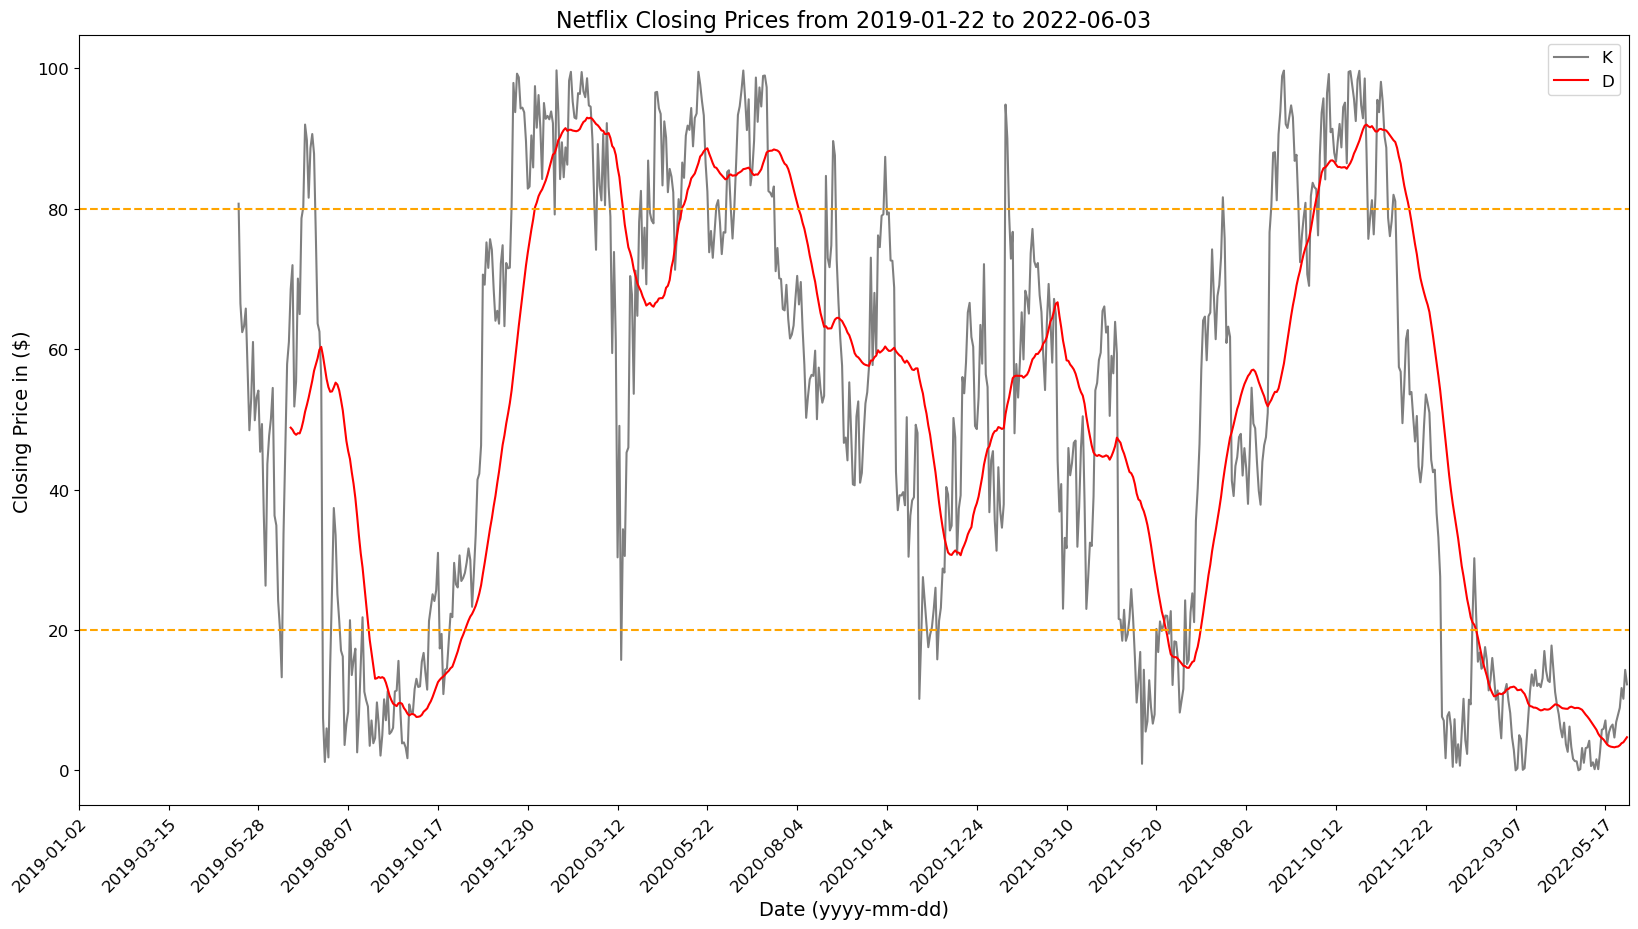

In [94]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(stock_cases['Date'], stock_cases['%K'], color = 'k', alpha=0.5, label='K')
ax.plot(stock_cases['Date'], stock_cases['%D'], color = 'red', label='D')
ax.axhline(20, linestyle='--', color="orange")
ax.axhline(80, linestyle="--", color="orange")
plt.xticks(np.arange(0, length, 50), rotation = 45, rotation_mode = 'anchor', ha = 'right', fontsize='12')
plt.yticks(fontsize='12')
plt.xlim(0, length)
plt.legend(fontsize='12')
plt.xlabel('Date (yyyy-mm-dd)', fontsize='14')
plt.ylabel('Closing Price in ($)', fontsize='14')
plt.title('Netflix Closing Prices from 2019-01-22 to 2022-06-03', fontsize='16')
plt.show()

In [28]:
# Define Exponential Moving Average
def EMA(df,period=7, Column='Close'):
    return df[Column].ewm(span=period, adjust=False).mean()

In [100]:
def RSIIndicator(df, period=14, Column='Close'):
    delta = df[Column].diff(1)
    df['gain'] = delta.clip(lower=0).round(2)
    df['loss'] = delta.clip(upper=0).abs().round(2)
    df['avg_gain'] = df['gain'].rolling(window=period, min_periods=period).mean()[:period+1]
    df['avg_loss'] = df['loss'].rolling(window=period, min_periods=period).mean()[:period+1]
    for i, row in enumerate(df['avg_gain'].iloc[period+1:]):
    # Average Gain 
        df['avg_gain'].iloc[i + period + 1] =\
        (df['avg_gain'].iloc[i + period] *(period - 1) + df['gain'].iloc[i + period + 1])\
        / period
    # Average Losses
    for i, row in enumerate(df['avg_loss'].iloc[period+1:]):
        df['avg_loss'].iloc[i + period + 1] =\
        (df['avg_loss'].iloc[i + period] *
         (period - 1) +
         df['loss'].iloc[i + period + 1])\
        / period
        # Calculate RS Values
    df['rs'] = df['avg_gain'] / df['avg_loss']
    # Calculate RSI
    df['rsi'] = 100 - (100 / (1.0 + df['rs']))
    return

In [112]:
RSIIndicator(stock_cases,14)
stock_cases

C:\Users\Theid\AppData\Local\Temp\ipykernel_28172\746946237.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_gain'].iloc[i + period + 1] =\
C:\Users\Theid\AppData\Local\Temp\ipykernel_28172\746946237.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_loss'].iloc[i + period + 1] =\


,Date,Open,High,Low,Close,Adj Close,Volume,New Cases,New Deaths,Case Fatality,...,14high,14low,%K,%D,gain,loss,avg_gain,avg_loss,rs,rsi
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,3.54,0.00,NaN,NaN,NaN,NaN
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,26.37,0.00,NaN,NaN,NaN,NaN
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,17.77,0.00,NaN,NaN,NaN,NaN
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,4.93,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,568074.0,1916.0,0.34,...,526.640015,162.710007,8.924792,3.579003,3.79,0.00,3.306871,4.465701,0.740504,42.545386
859,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,618580.0,1477.0,0.24,...,458.480011,162.710007,11.742230,3.881857,2.25,0.00,3.231380,4.146722,0.779261,43.796897
860,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200,692064.0,2064.0,0.30,...,458.480011,162.710007,10.210635,4.013726,0.00,4.53,3.000567,4.174099,0.718854,41.821694
861,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100,524610.0,1634.0,0.31,...,458.480011,162.710007,14.328697,4.379612,12.18,0.00,3.656241,3.875949,0.943315,48.541536


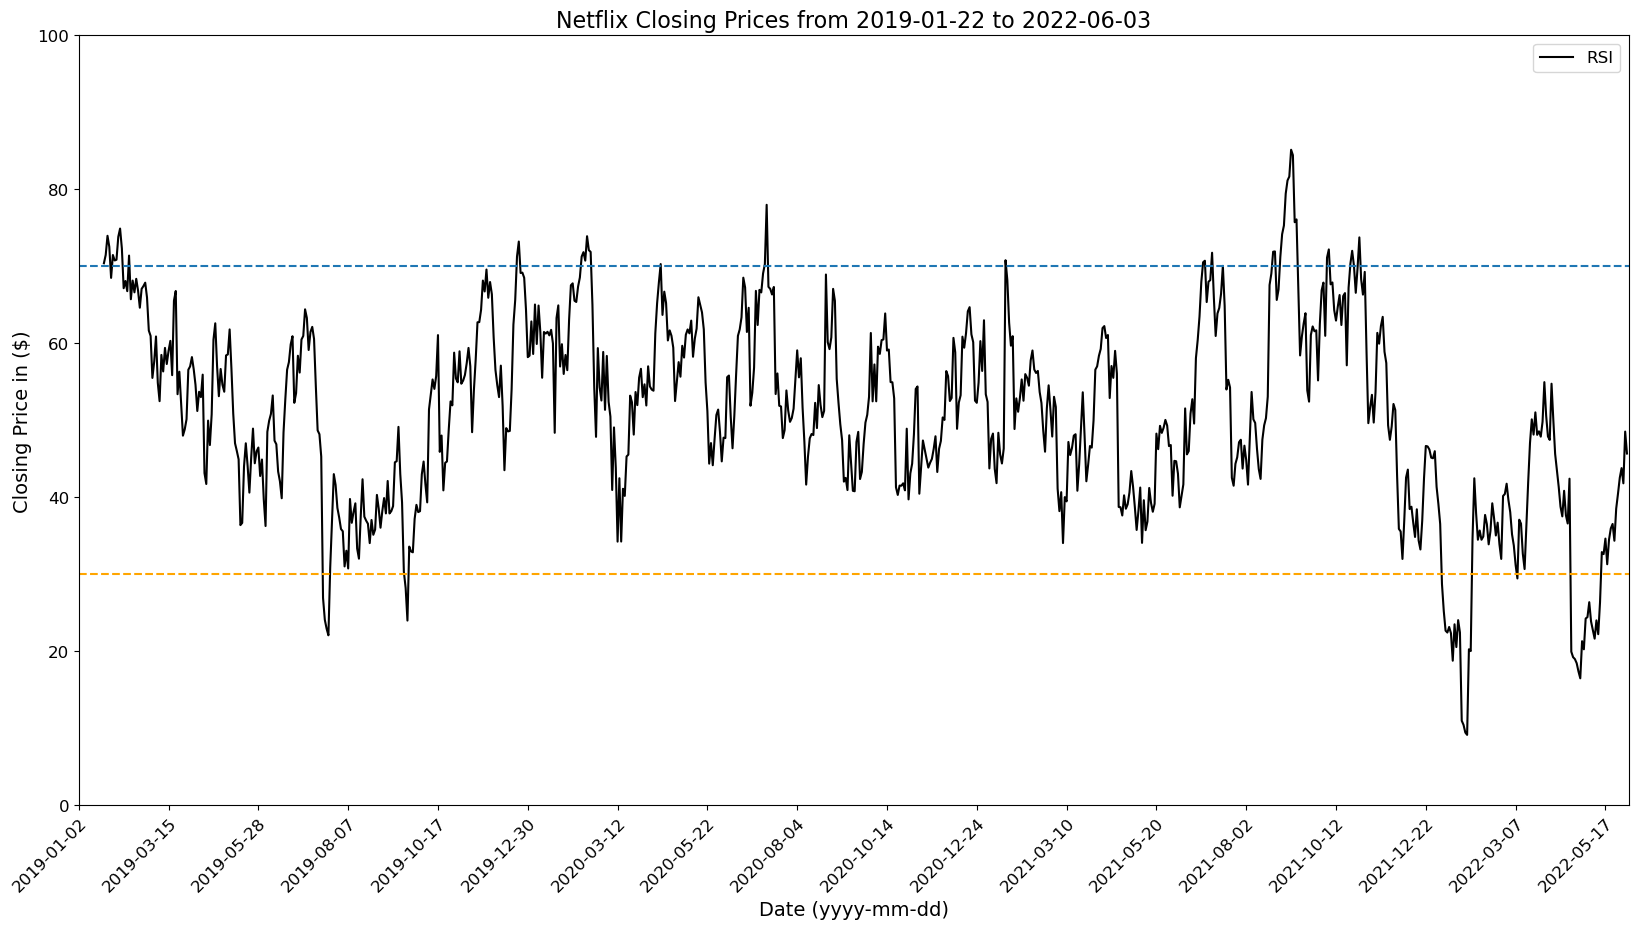

In [113]:
plt.figure(figsize=(20,10))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.plot(stock_cases['Date'], stock_cases['rsi'], color = 'k', label='RSI')
plt.axhline(30, linestyle='--', color="orange")
plt.axhline(70, linestyle="--", color="tab:blue")
plt.xticks(np.arange(0, length, 50), rotation = 45, rotation_mode = 'anchor', ha = 'right', fontsize='12')
plt.yticks(fontsize='12')
plt.xlim(0, length)
plt.ylim(0, 100)
plt.legend(fontsize='12')
plt.xlabel('Date (yyyy-mm-dd)', fontsize='14')
plt.ylabel('Closing Price in ($)', fontsize='14')
plt.title('Netflix Closing Prices from 2019-01-22 to 2022-06-03', fontsize='16')
plt.show()

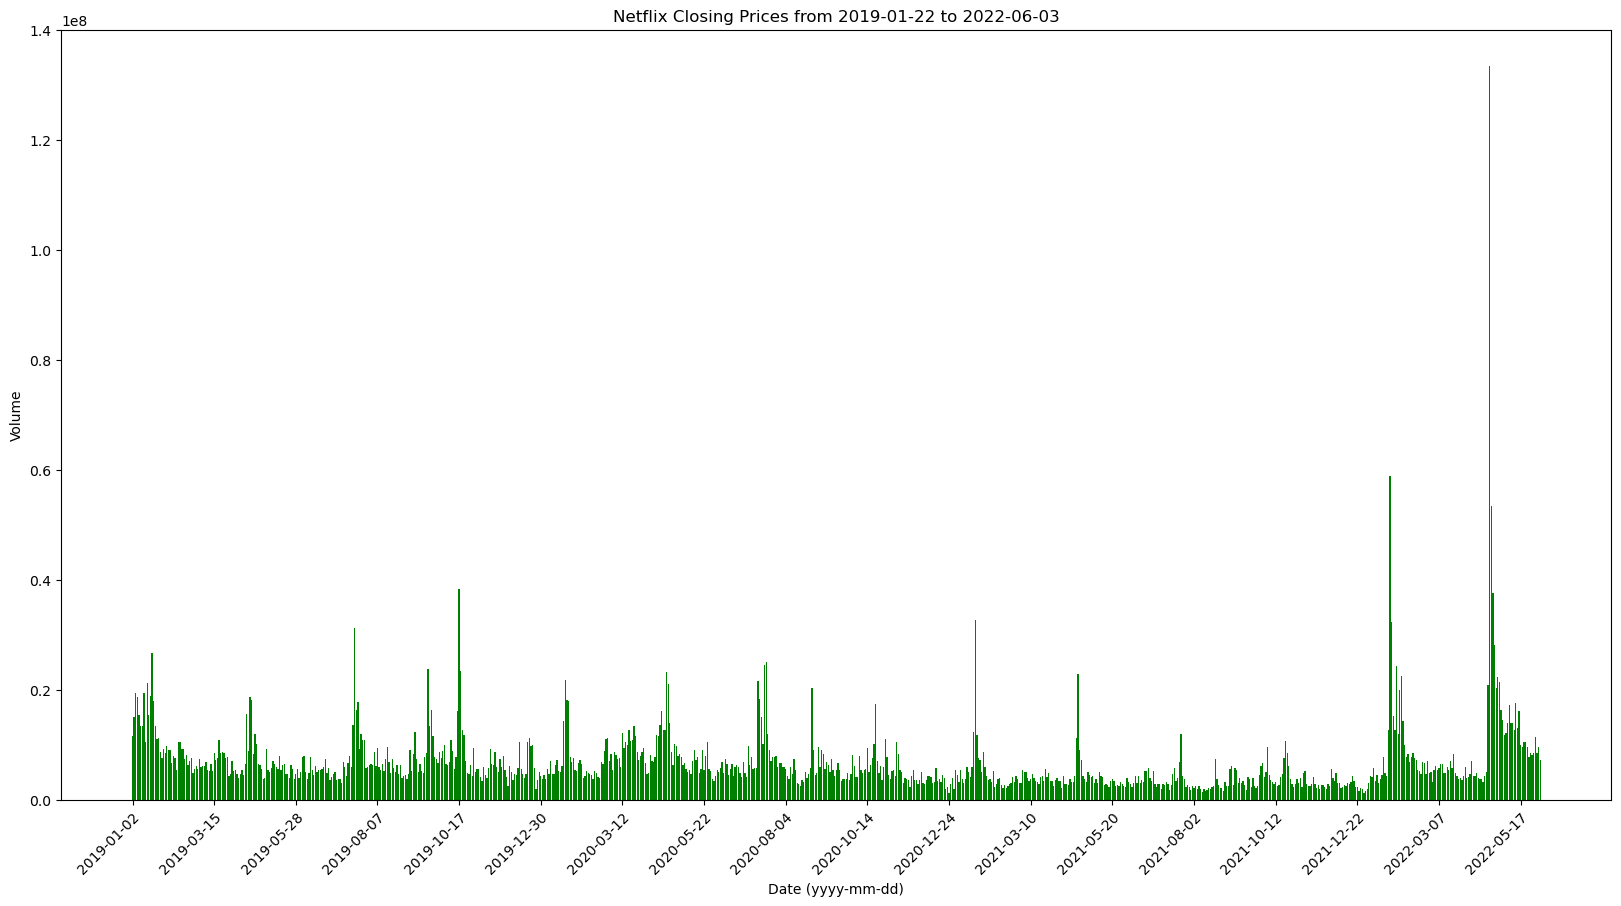

In [114]:
plt.figure(figsize=(20,10))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.bar(stock_cases['Date'], stock_cases['Volume'], color = 'green')
plt.xticks(np.arange(0, len(stock_cases['Date']), 50), rotation = 45, rotation_mode = 'anchor', ha = 'right')
# plt.xlim(0, 598)
plt.xlabel('Date (yyyy-mm-dd)')
plt.ylabel('Volume')
plt.title('Netflix Closing Prices from 2019-01-22 to 2022-06-03')
plt.show()

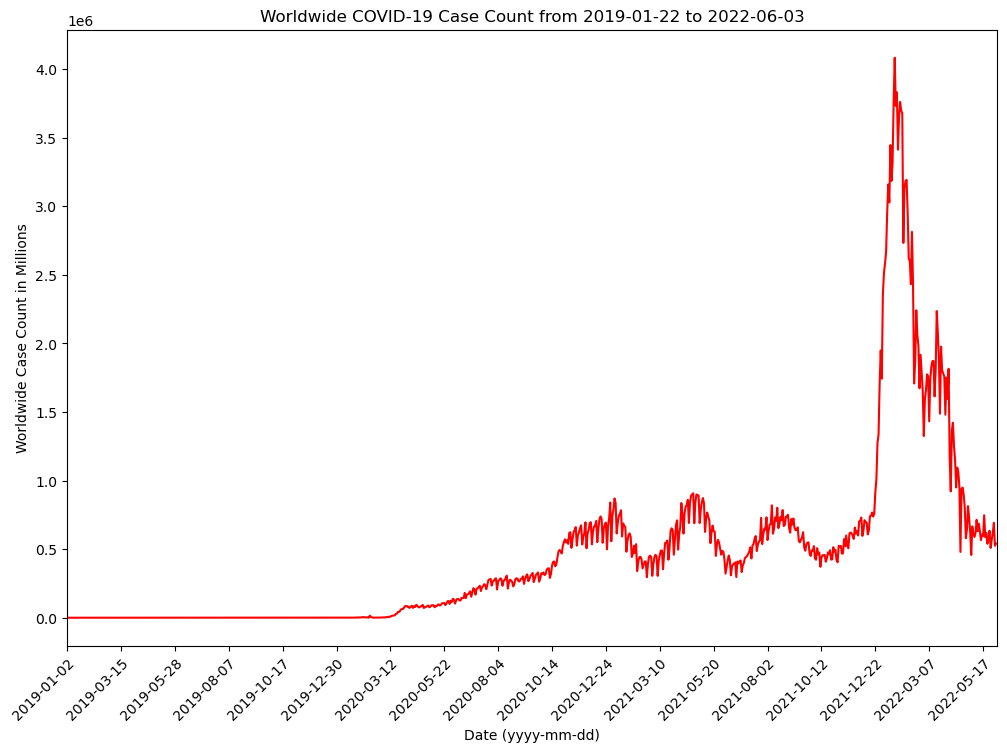

In [115]:
plt.figure(figsize=(12,8))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.plot(stock_cases['Date'], stock_cases['New Cases'], color = 'red')
plt.xticks(np.arange(0, len(stock_cases['Date']), 50), rotation = 45, rotation_mode = 'anchor', ha = 'right')
plt.xlim(0, len(stock_cases['Date']))
plt.xlabel('Date (yyyy-mm-dd)')
plt.ylabel('Worldwide Case Count in Millions')
plt.title('Worldwide COVID-19 Case Count from 2019-01-22 to 2022-06-03')
plt.show()

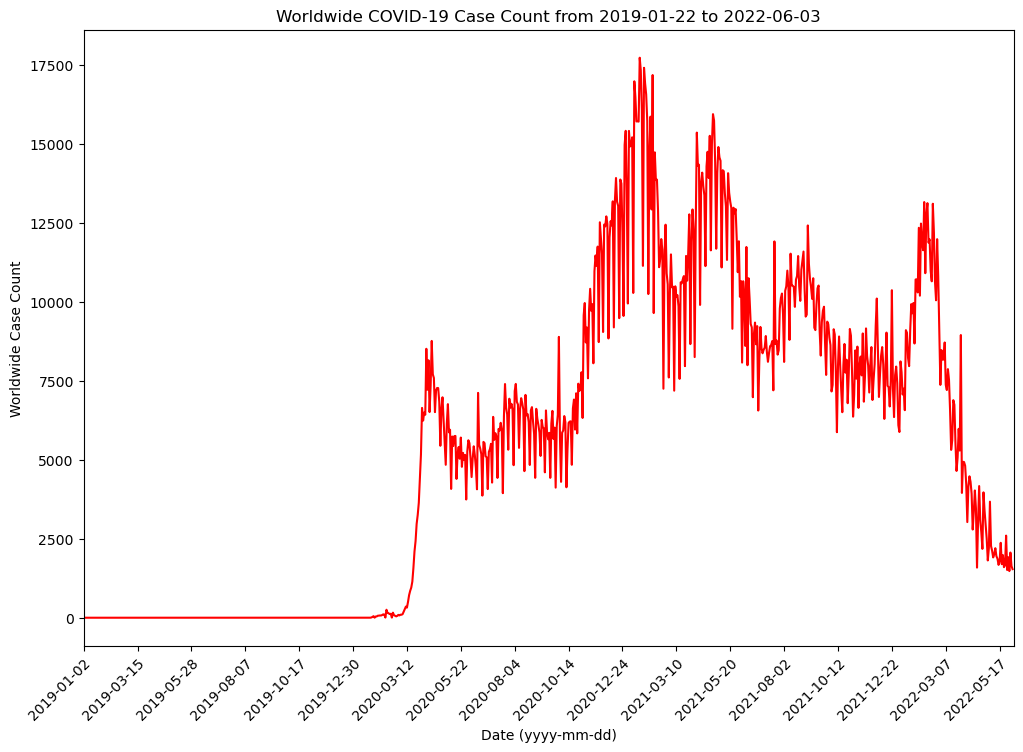

In [116]:
plt.figure(figsize=(12,8))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.plot(stock_cases['Date'], stock_cases['New Deaths'], color = 'red')
plt.xticks(np.arange(0, len(stock_cases['Date']), 50), rotation = 45, rotation_mode = 'anchor', ha = 'right')
plt.xlim(0, len(stock_cases['Date']))
plt.xlabel('Date (yyyy-mm-dd)')
plt.ylabel('Worldwide Case Count')
plt.title('Worldwide COVID-19 Case Count from 2019-01-22 to 2022-06-03')
plt.show()

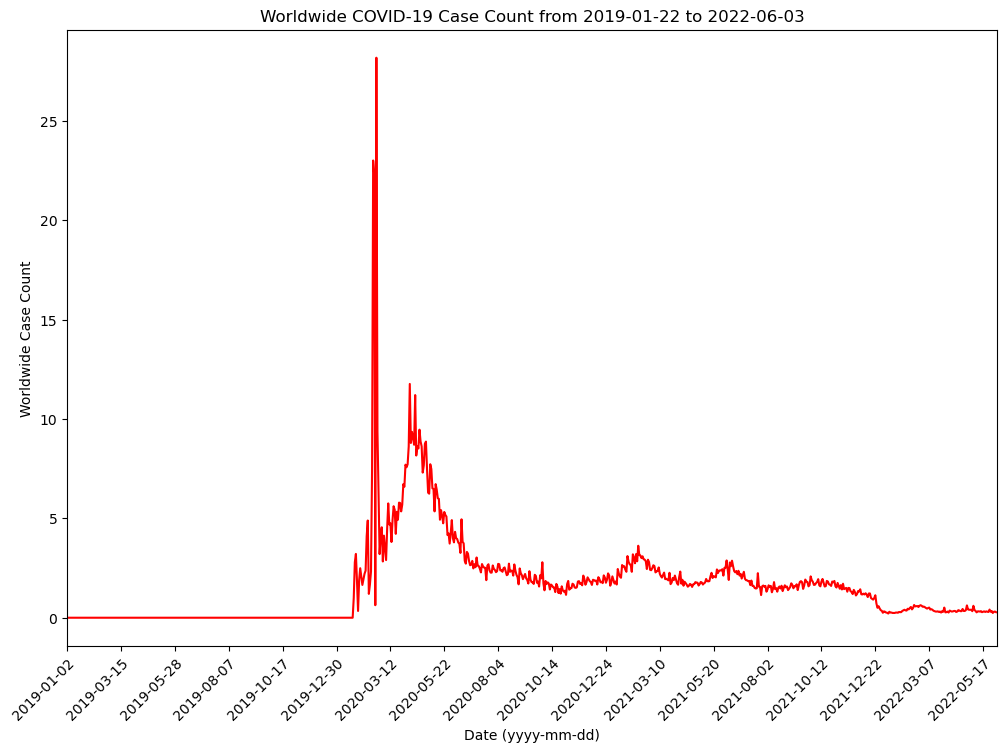

In [117]:
plt.figure(figsize=(12,8))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.plot(stock_cases['Date'], stock_cases['Case Fatality'], color = 'red')
plt.xticks(np.arange(0, len(stock_cases['Date']), 50), rotation = 45, rotation_mode = 'anchor', ha = 'right')
plt.xlim(0, len(stock_cases['Date']))
plt.xlabel('Date (yyyy-mm-dd)')
plt.ylabel('Worldwide Case Count')
plt.title('Worldwide COVID-19 Case Count from 2019-01-22 to 2022-06-03')
plt.show()

In [135]:
Sti=stock_cases.loc[stock_cases['Date']>'2020-02-02'][['Date','New Deaths','rsi']].fillna(0)
Sti

,Date,New Deaths,rsi
273,2020-02-03,64.0,63.056227
274,2020-02-04,66.0,67.540083
275,2020-02-05,72.0,67.792437
276,2020-02-06,70.0,65.531331
277,2020-02-07,85.0,65.375933
...,...,...,...
858,2022-05-27,1916.0,42.545386
859,2022-05-31,1477.0,43.796897
860,2022-06-01,2064.0,41.821694
861,2022-06-02,1634.0,48.541536


The r-value is 0.02


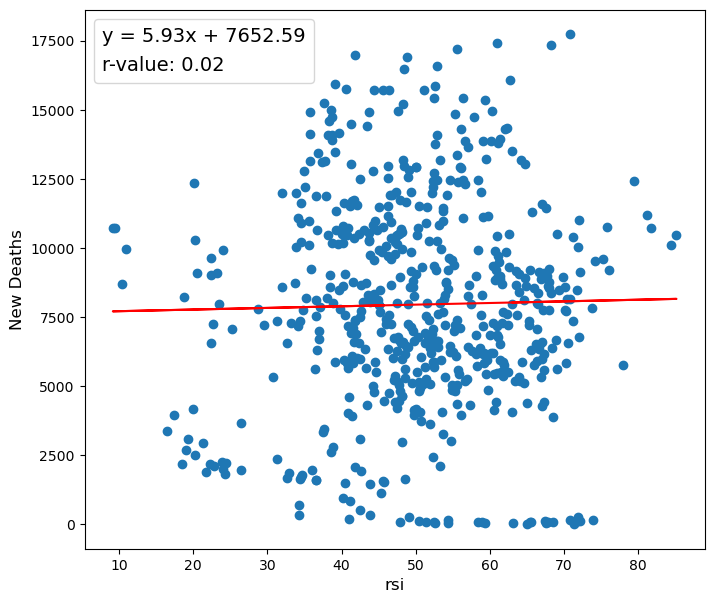

In [136]:
# def LRPlot(paramo,nameo):
#     hemisphere=[northern_hemi_df,southern_hemi_df]
#     hemispherename=["Northern Hemisphere","Southern Hemisphere"]
#     for bowl in hemisphere:
y_values = Sti['New Deaths']
x_values = Sti['rsi']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2="r-value: " + str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
handles, labels = plt.gca().get_legend_handles_labels()
patch_1 = mpatches.Patch(color='none', label=line_eq)
patch_2 = mpatches.Patch(color='none', label=r2)
handles.extend([patch_1, patch_2])
plt.legend(fontsize=14, loc='best',handlelength=0, handletextpad=0, fancybox=True, handles=handles)
        
plt.xlabel('rsi', fontsize=12)
plt.ylabel('New Deaths', fontsize=12)
        
#         if bowl is hemisphere[0]:
#             Geo=hemispherename[0] 
#         else:
#             Geo=hemispherename[1]
            
#         plt.title("City Latitude" + " " +"vs." + " " + nameo + " " + "(" +\
#             str(time.gmtime(city_data_df["Date"][0])[0]) + "-" + str(time.gmtime(city_data_df["Date"][0])[1]) + "-" +\
#                 str(time.gmtime(city_data_df["Date"][0])[2]) + ")" + " " + "in" + " " + Geo, fontsize=14)
plt.gcf().set_size_inches(8, 7)
print(f"The r-value is {round(rvalue,2)}")
#         plt.savefig(OutputDir + paramo + " " + "LR" + " " + Geo +".png")
plt.show()


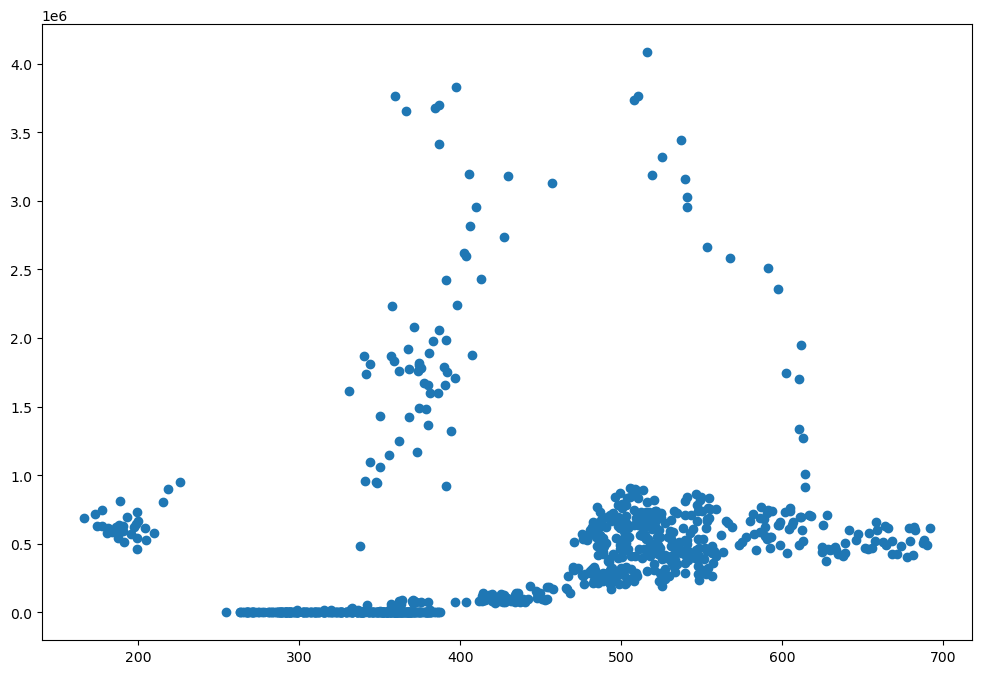

In [119]:
plt.figure(figsize=(12,8))
plt.scatter(stock_cases['Close'], stock_cases['New Cases'])
plt.show()